In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("computerhardware.csv")

In [3]:

df.columns = ['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax',
             'prp', 'erp']

In [4]:
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [5]:
df.isnull().sum()

vendor    0
model     0
myct      0
mmin      0
mmax      0
cach      0
chmin     0
chmax     0
prp       0
erp       0
dtype: int64

In [6]:
df.nunique()

vendor     29
model     208
myct       60
mmin       25
mmax       23
cach       22
chmin      15
chmax      31
prp       115
erp       103
dtype: int64

In [7]:
df['prp'].nunique()

115

In [8]:
df['prp'].value_counts()

32      7
50      6
40      6
22      6
24      5
       ..
67      1
69      1
1150    1
120     1
259     1
Name: prp, Length: 115, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
vendor    208 non-null object
model     208 non-null object
myct      208 non-null int64
mmin      208 non-null int64
mmax      208 non-null int64
cach      208 non-null int64
chmin     208 non-null int64
chmax     208 non-null int64
prp       208 non-null int64
erp       208 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [10]:
df.describe

<bound method NDFrame.describe of      vendor          model  myct  mmin   mmax  cach  chmin  chmax  prp  erp
0    amdahl         470v/7    29  8000  32000    32      8     32  269  253
1    amdahl        470v/7a    29  8000  32000    32      8     32  220  253
2    amdahl        470v/7b    29  8000  32000    32      8     32  172  253
3    amdahl        470v/7c    29  8000  16000    32      8     16  132  132
4    amdahl         470v/b    26  8000  32000    64      8     32  318  290
..      ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
203  sperry           80/8   124  1000   8000     0      1      8   42   37
204  sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
205  sratus             32   125  2000   8000     0      2     14   52   41
206    wang         vs-100   480   512   8000    32      0      0   67   47
207    wang          vs-90   480  1000   4000     0      0      0   45   25

[208 rows x 10 columns]>

In [11]:
df['vendor'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
dg               7
hp               7
harris           7
ipl              6
dec              6
c.r.d            6
magnuson         6
cambex           5
prime            5
formation        5
gould            3
perkin-elmer     3
nixdorf          3
apollo           2
basf             2
bti              2
wang             2
microdata        1
four-phase       1
sratus           1
Name: vendor, dtype: int64

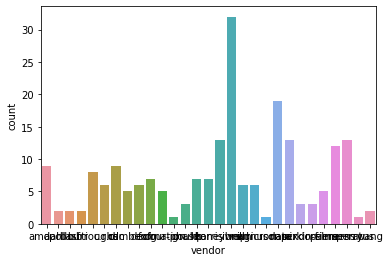

In [12]:
sns.countplot(x='vendor', data=df)

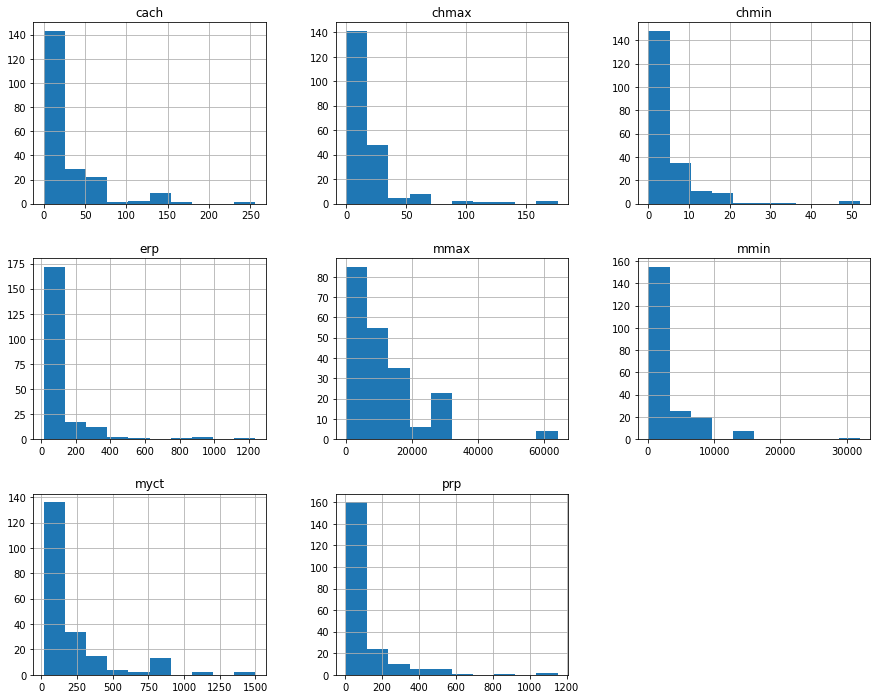

In [13]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

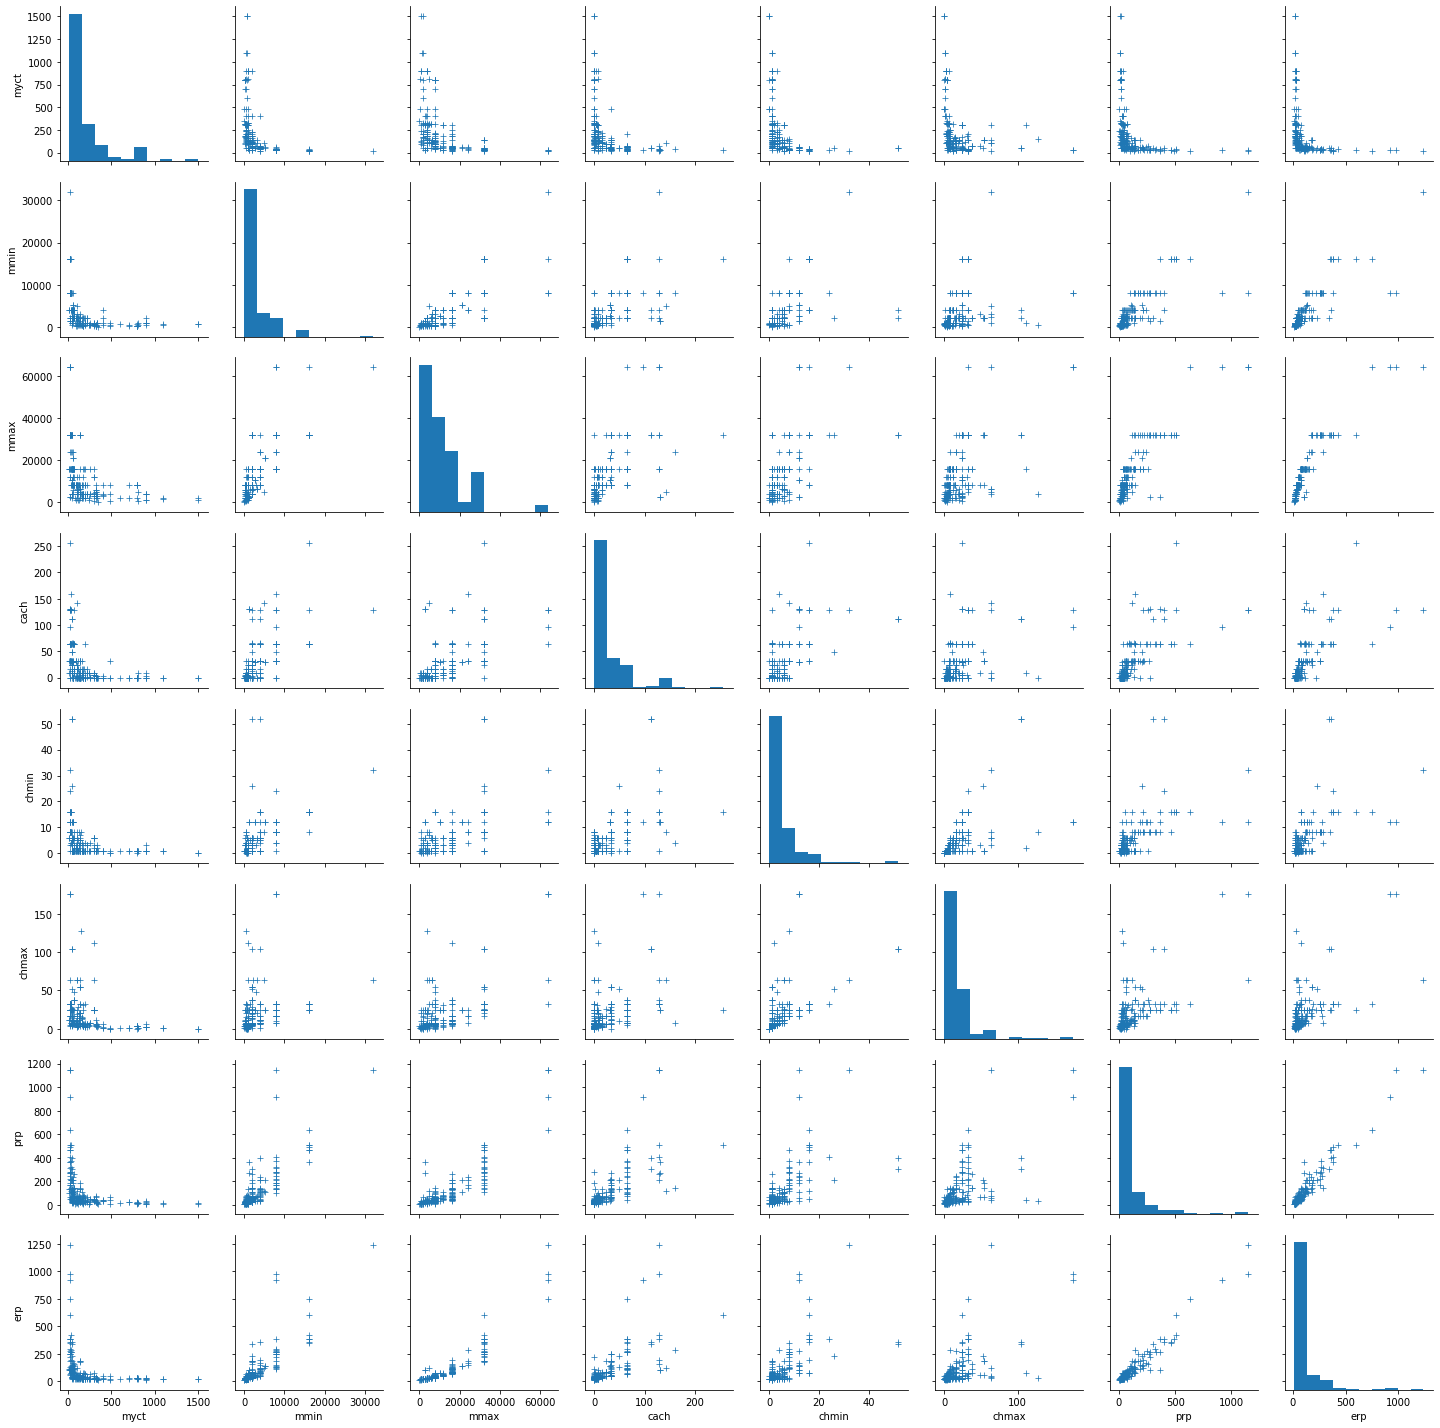

In [14]:
pairplot = sns.pairplot(df, markers='+')
plt.show()

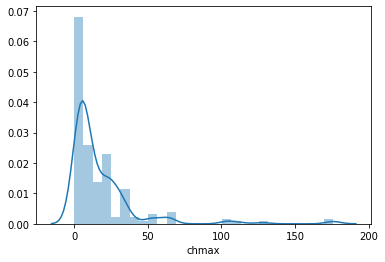

In [15]:
sns.distplot(df['chmax'])
#value ranging between 0 and 50

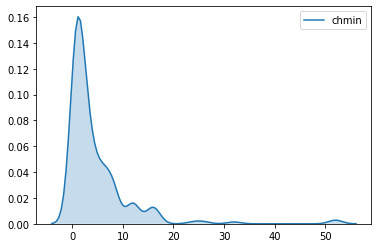

In [16]:
sns.kdeplot(df['chmin'],shade=True)
#value ranging between 0 and 20 mostly

In [17]:
df.corr()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
myct,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
mmin,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
mmax,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
cach,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
chmin,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
chmax,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
prp,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
erp,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


Text(0.5, 1, 'Correlation Matrix')

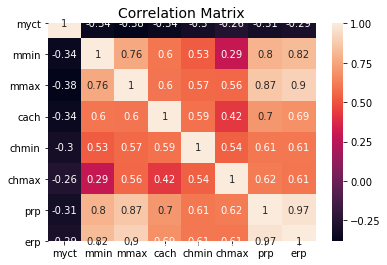

In [18]:
sns.heatmap(df[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp','erp']].corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

In [19]:
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


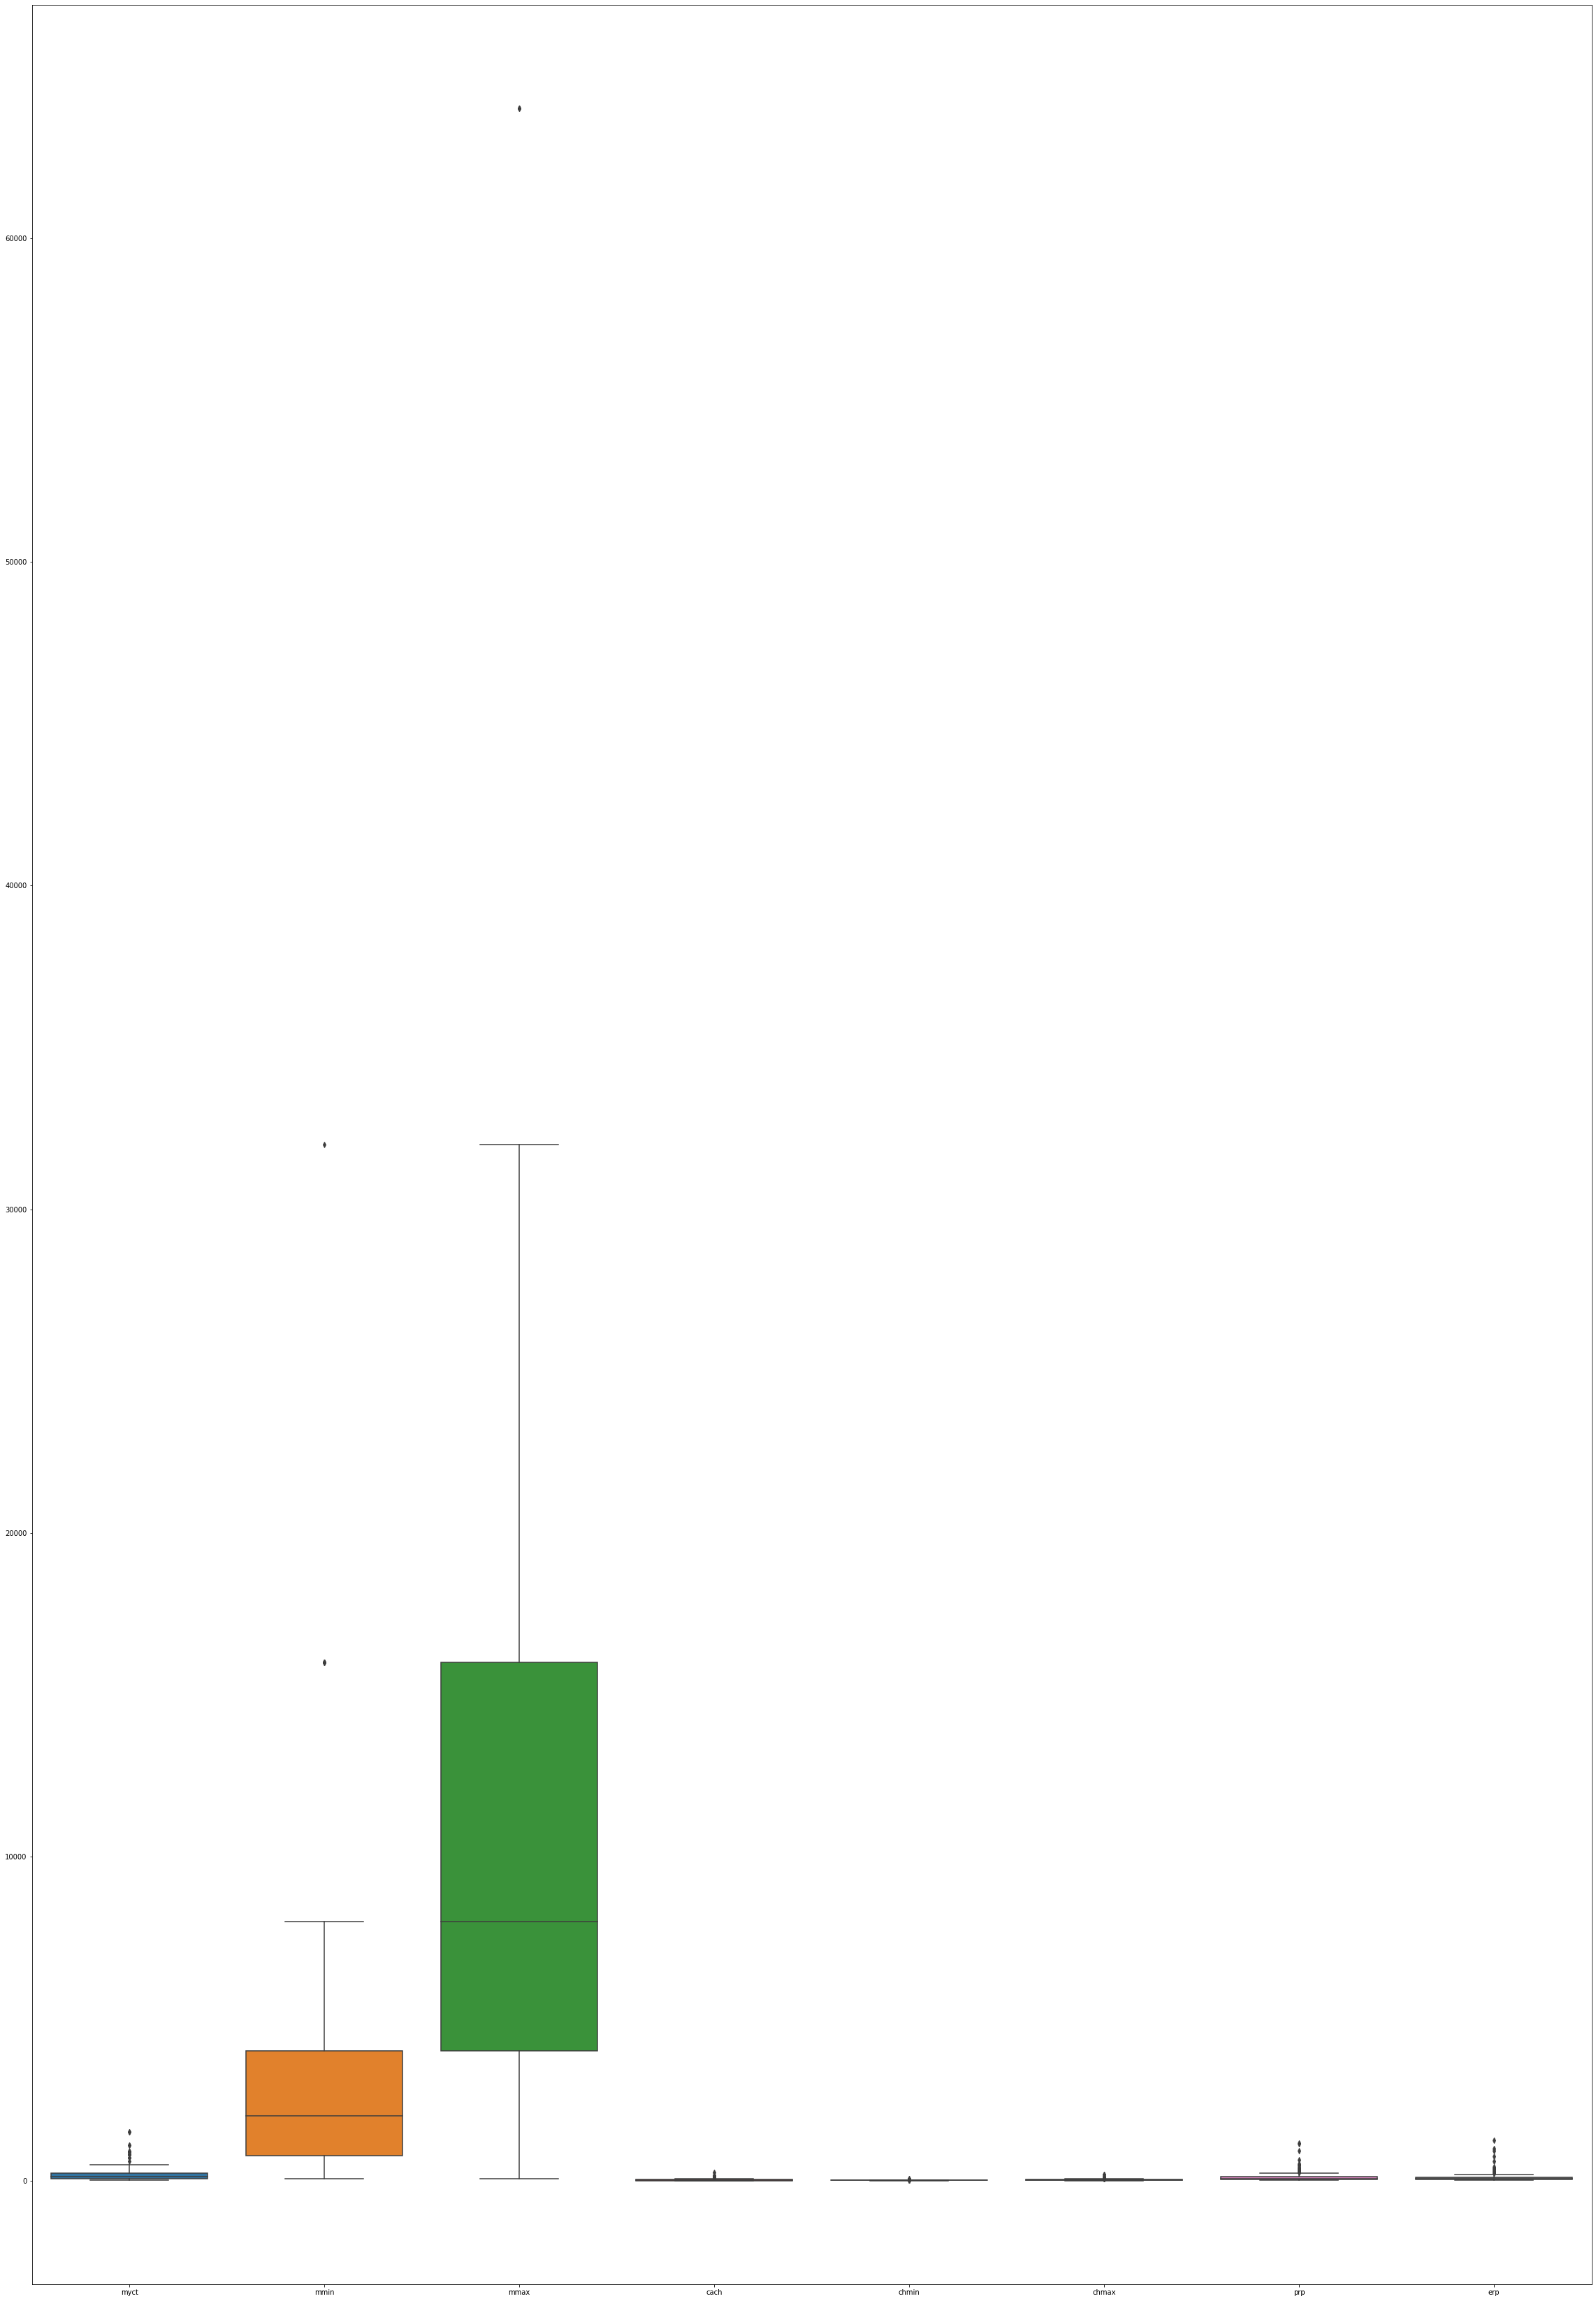

In [20]:
plt.figure(figsize = (40,60))
sns.boxplot(data=df)

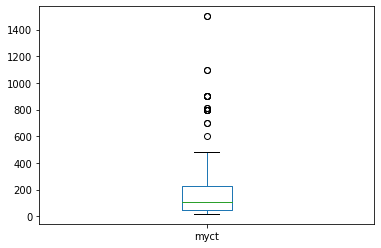

In [21]:
#myct,prp,erp have outliers present we will drop erp as we be predicting prp because that is the published relative performance
df['myct'].plot.box()

In [22]:
df.loc[df['myct']>600,'']=np.mean(df['myct'])

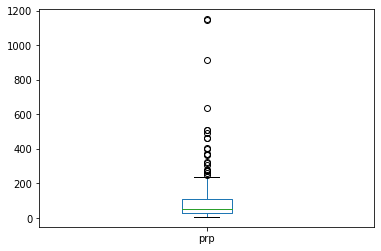

In [23]:
df['prp'].plot.box()

In [24]:
df.loc[df['myct']>600,'']=np.mean(df['myct'])

In [25]:
#lets prepare our model
x = df[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax']]
y = df['prp']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=496)
#setting up random state at 496 by calculating max  r state in range(42,800)(below code)

In [27]:
x_test.shape

(63, 6)

In [28]:
y_test.shape

(63,)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)

print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(x_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))


Linear Regression - Train accuracy:  0.8316126550294122

Linear Regression - Test accuracy:  0.9424708398361393


In [30]:
# r2 score random state  ridge random forest regressor decision tree classification svm
from sklearn import linear_model
max_r_score=0
for r_state in range(42,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.3)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)    

max r2 score corresponding to  496  is  0.9424708398361393


In [31]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 139.82071970429706
Mean squared error: 139.82071970429706
Root Mean Squared error: 218.32671454968317


In [32]:
scores = cross_val_score(lr, x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [33]:
rmse_scores = np.sqrt(-scores)

In [34]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  70.18202758958338 
Standard Deviation: 45.58903134152034


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [36]:
tree_reg_scores = np.sqrt(-scores)

In [37]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  70.18202758958338 
Standard Deviation: 58.79301088300749


In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [40]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [41]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  59.30253312646742 
Standard Deviation: 59.84685480551956


In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
r2_score(tree_reg.predict(x_train),y_train)

0.9989340407568593

In [44]:
r2_score(tree_reg.predict(x_test),y_test)

0.8097949545243113

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
knn = KNeighborsRegressor(n_neighbors=3)

In [47]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [48]:
r2_score(knn_reg.predict(x_train),y_train)

0.8021832385102667

In [49]:
r2_score(knn_reg.predict(x_test),y_test)

0.6626991081433276

In [50]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.8815833712794382


In [51]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [52]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 0.05087755  0.01495995  0.00515942  0.83877779 -0.54104215  1.64620187]
0.8585705980757126


In [53]:
def Snippet_197(): 
    print()
    print(format(' GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor

    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    model = GradientBoostingRegressor()
    parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 
                 }
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(x_train, y_train)    

    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
    print("\n ========================================================")
Snippet_197()


************************** GridSearchCV  for Regression***************************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9141719478995712

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.

In [54]:
#lets convert the model to classification on grades 0 grade for best prp 1 grade for medium prp and 2 for low prp
prpgrade = []
for i in df['prp']:
    if i >= 6 and i <= 396:
        prpgrade.append('0')
    elif i >= 396 and i <=786 :
        prpgrade.append('1')
    elif i >= 786 and i <=1159:
        prpgrade.append('2')
        
    
df['prpgrade'] = prpgrade
    
    

In [55]:
columns_target=['prpgrade']
columns_train=['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax' ]
x=df[columns_train]
y=df[columns_target]

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=78)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [59]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score)

[[51  0]
 [ 1  0]]
0.9807692307692307


In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [62]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.966346 using {'dual': True, 'max_iter': 100}
Execution time: 0.18795275688171387 ms


In [63]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

1.0
[[51  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         1

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [64]:
from sklearn.svm import SVC
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)


In [65]:
svmkernel('rbf')

Mean Scores 0.9666334440753046
Standard deviation 0.018213110547348997
[[196   1   0]
 [  5   3   0]
 [  1   0   2]]


In [66]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9807692307692307
linear
{'C': 1, 'kernel': 'linear'}


In [67]:
#for classification ada boost classifier
from sklearn.externals import joblib
joblib.dump(ad,'adcomputer.obj')
ad_from_joblib=joblib.load('adcomputer.obj')

In [68]:
#for regression-linear regression
from sklearn.externals import joblib
joblib.dump(lr,'lrcomputer.obj')
lr_from_joblib=joblib.load('lrcomputer.obj')